数据标准化：


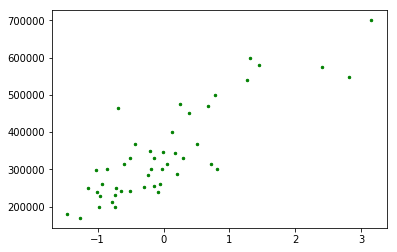

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 定义存储数据的x，y
x, y =[], []
with open('./file/prices.txt','r') as f:
    for sample in f.readlines():
        _x, _y = sample.split(',')
        x.append(float(_x))
        y.append(float(_y))

# 转换为数组
x, y = np.array(x), np.array(y)

# 标准化
# print(x.std())  # 标准差方程 std（）
x =(x-x.mean())/x.std()
# print(x)

#散点图显示
plt.figure()
plt.scatter(x, y, c='g', s=6)
print('数据标准化：')
plt.show()


In [2]:
# 训练方法

# 在（-2，4 ）区间内 取100个点
x0 = np.linspace(-2,4,100)
# polyfit 多项式拟合求解方法
# polyval 根据polifit得到的损失最小的参数p 计算出100个多项式返回的值，即预测值
# deg 代表多项式的次数
def get_model(deg):
    return lambda input_x = x0: np.polyval(np.polyfit(x,y,deg), input_x)                                   

96732238800.35297
96709317398.4086
83380464377.45616
77221612959.65364


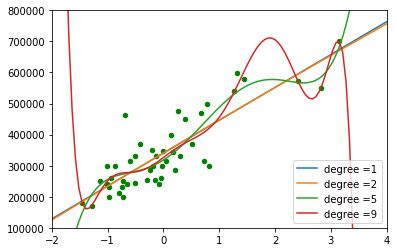

In [3]:
# 根据 不同的deg，即多项式的次数，测试不同的损失
# get_cost 损失函数
def get_cost(deg, input_x, input_y):
    return 0.5*((get_model(deg)(input_x)-input_y)**2).sum()

# 测试用的次数
test_set = (1,2,5,9)

# 测试开始  每次输出损失
for i in test_set:
    print(get_cost(i, x, y))

# 画出图像
plt.scatter(x,y,c='g',s=20)
for i in test_set:
    plt.plot(x0, get_model(i)(), label="degree ={}".format(i))

# 设置横纵坐标的范围
plt.xlim(-2,4)
plt.ylim(1e5,8e5)
# 正确显示label
plt.legend()
# 显示画面
plt.show()

# 方法总结：
## 1 数据预处理
### 1.1 数据标准化
## 2 设计模型
### 2.1 损失函数
### 2.2 训练模型 求损失函数最小的解
## 3 模型评估
### 3.1 是否过拟合，是否欠拟合
### 3.2 数据可视化
